In [53]:
import numpy as np
import pandas as pd

In [54]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [55]:
medical_df = pd.read_csv('/content/medical_insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [58]:
medical_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [59]:
!pip install plotly matplotlib seaborn --quiet

In [60]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [62]:
medical_df.age.describe()

,age
count,2772.000000
mean,39.109668
std,14.081459
min,18.000000
25%,26.000000
50%,39.000000
75%,51.000000
max,64.000000


In [63]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [64]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [65]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [66]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'

)
fig.update_layout(bargap=0.1)
fig.show()

In [67]:
fig = px.histogram(medical_df,
                  x = "charges",
                  marginal = 'box',
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

In [68]:
medical_df.smoker.value_counts()

,count
smoker,
no,2208
yes,564


In [69]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [70]:
fig = px.histogram(medical_df,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()

In [71]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [72]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [73]:
px.violin(medical_df,x = 'children',y = 'charges')

<Axes: xlabel='sex', ylabel='charges'>

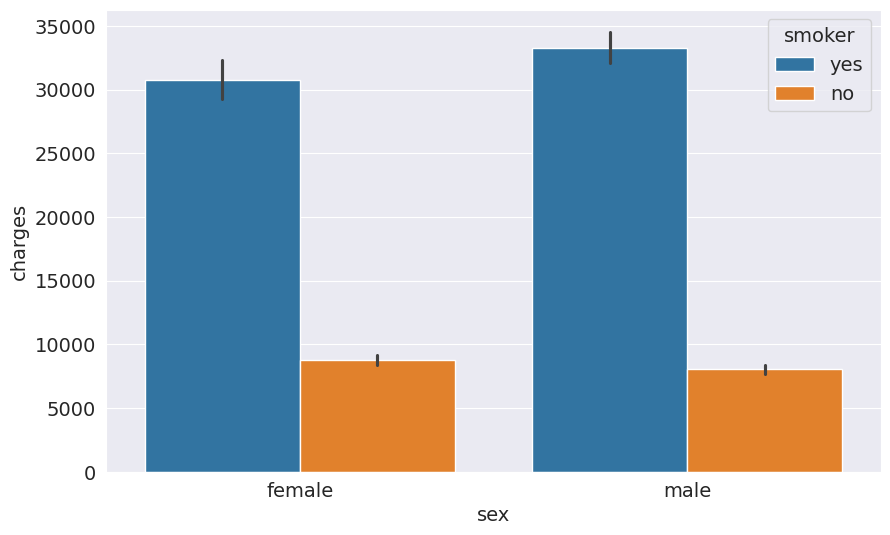

In [74]:
sns.barplot(data = medical_df,x = 'sex',y = 'charges',hue = "smoker")

In [75]:
px.histogram(medical_df,x='sex',y = 'charges',color = 'region')

In [76]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2986236656293629)

In [77]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19984604873978873)

In [78]:
medical_df.children.corr(medical_df.charges)

np.float64(0.0664423178012545)

In [79]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7887833491419141)

In [80]:
# Select only numeric columns for correlation calculation
numeric_df = medical_df.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
numeric_df.corr()

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


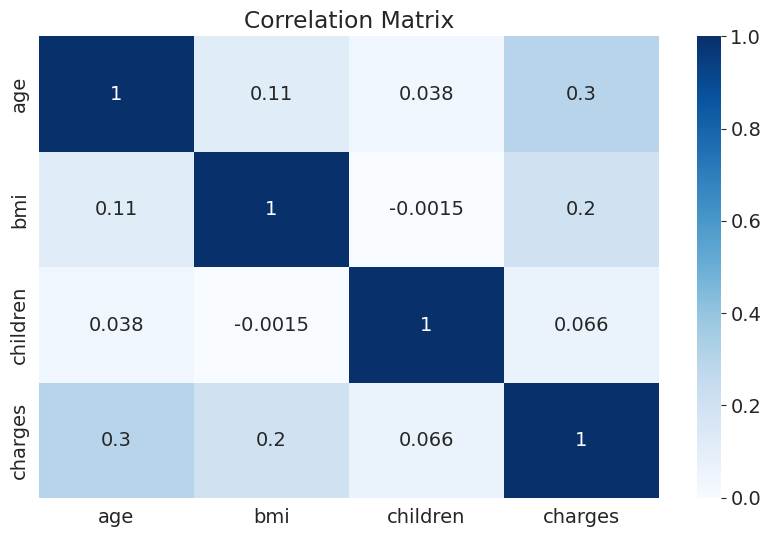

In [83]:
# Select only numeric columns for correlation calculation
numeric_df = medical_df.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
# sns.heatmap(medical_df.corr(), cmap='Blues', annot=True) # This line caused the error
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True) # Use the numeric DataFrame instead
plt.title('Correlation Matrix');

In [84]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

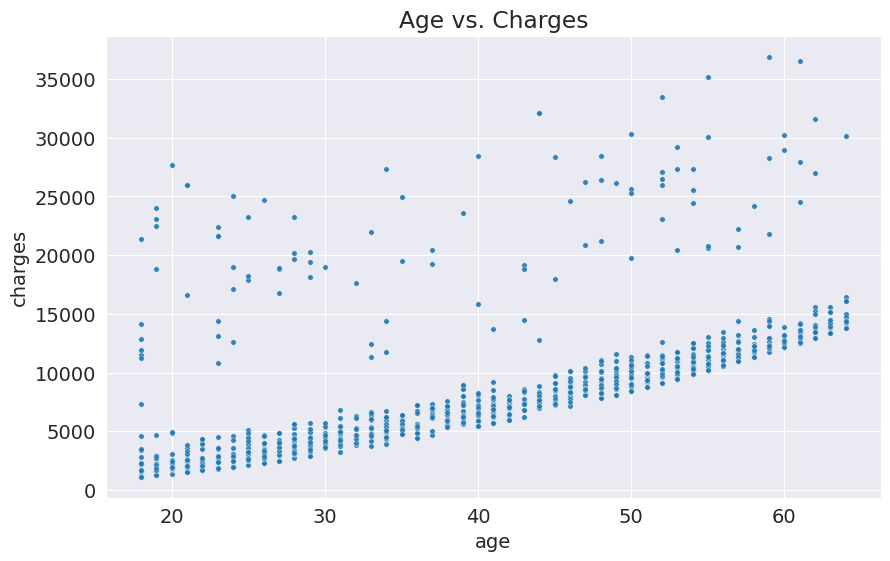

In [85]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [86]:
def estimate_charges(age, w, b):
    return w * age + b

In [87]:
w = 50
b = 100

In [88]:
estimate_charges(30,w,b)

1600

In [89]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
2766,1000
2767,2450
2768,1150
2770,1250


In [90]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
2766,1711.02680
2767,8569.86180
2768,2020.17700
2770,21595.38229


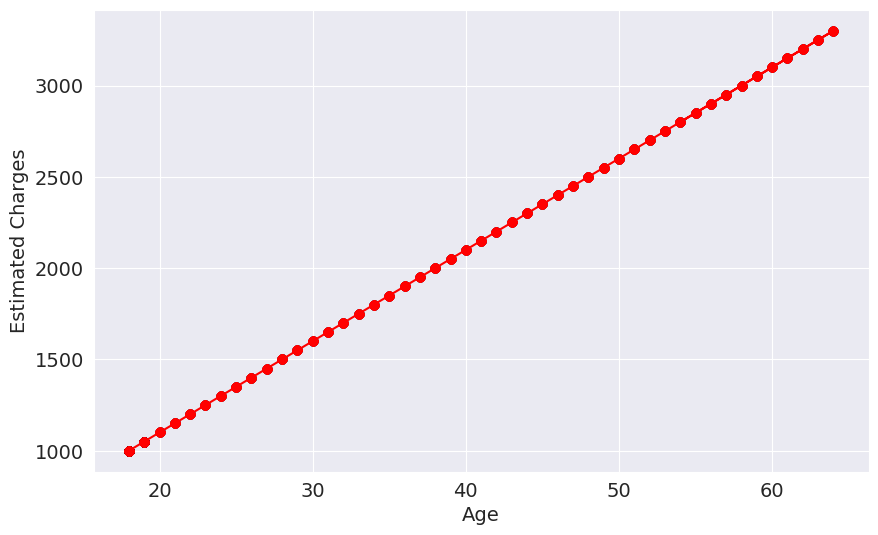

In [91]:
plt.scatter(ages, estimated_charges);
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

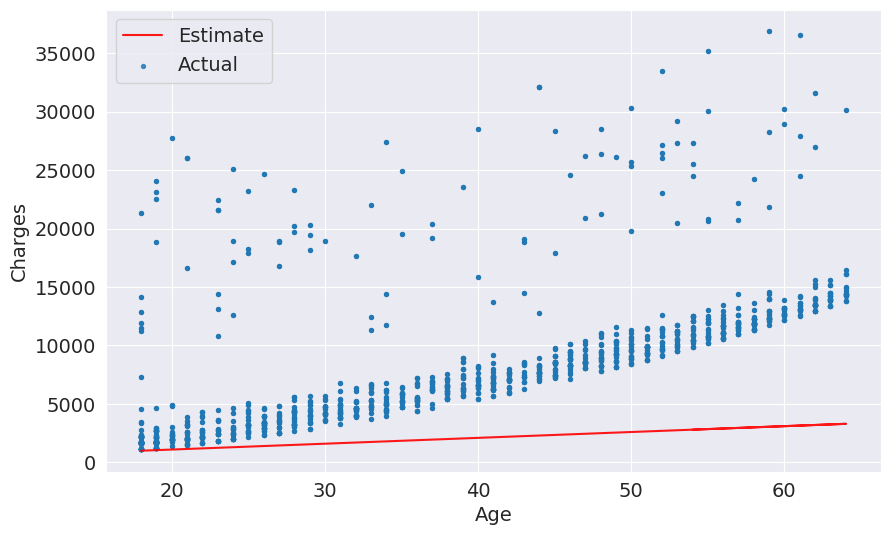

In [92]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [93]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

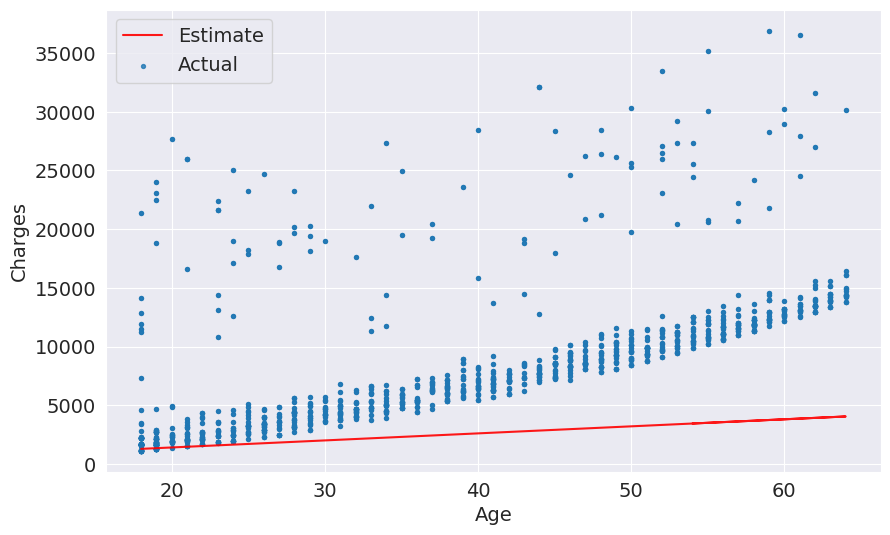

In [94]:
try_parameters(60, 200)

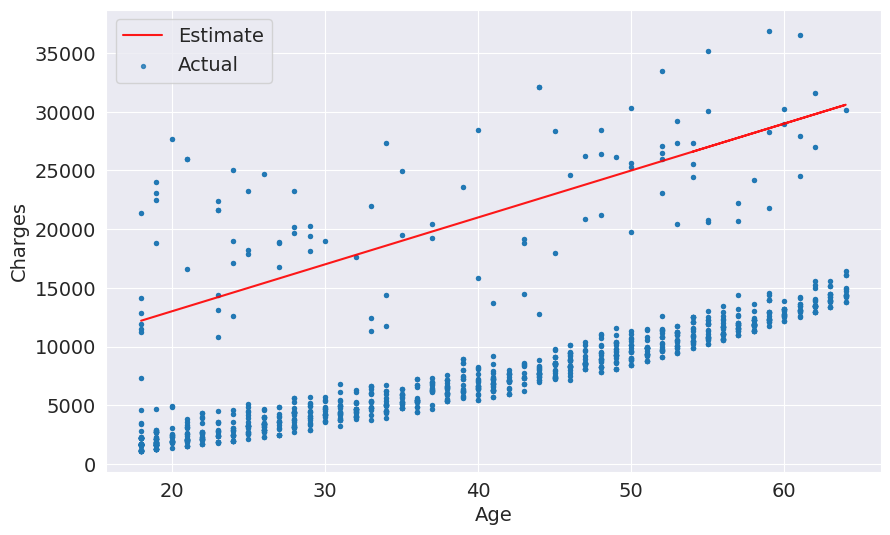

In [95]:
try_parameters(400, 5000)

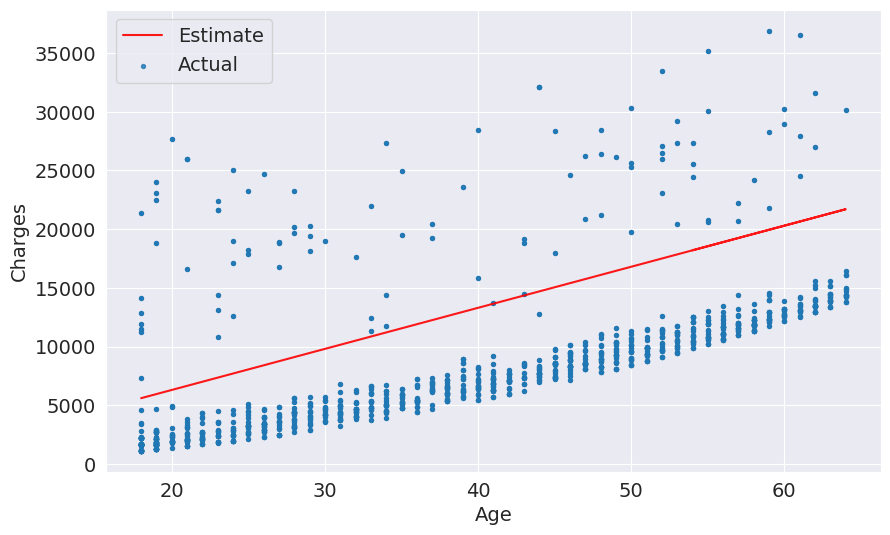

In [96]:
try_parameters(350,-700)

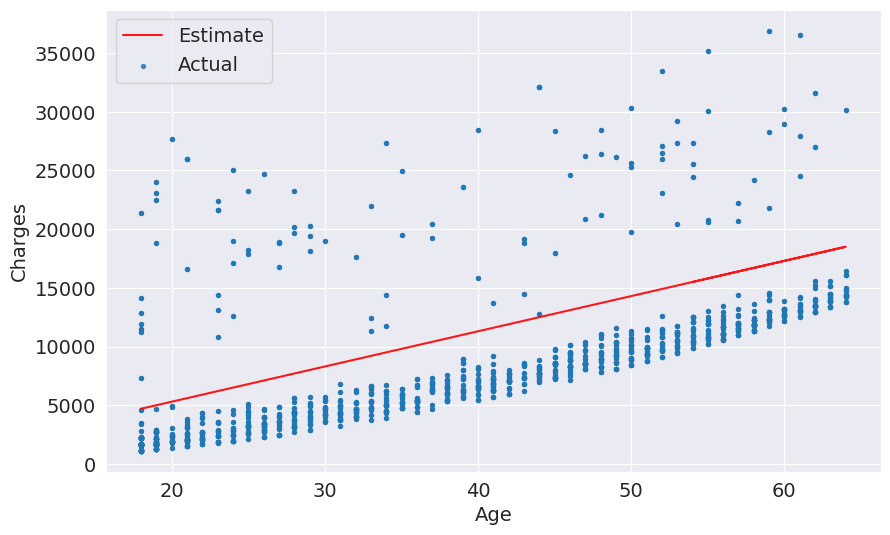

In [97]:
try_parameters(300,-700)

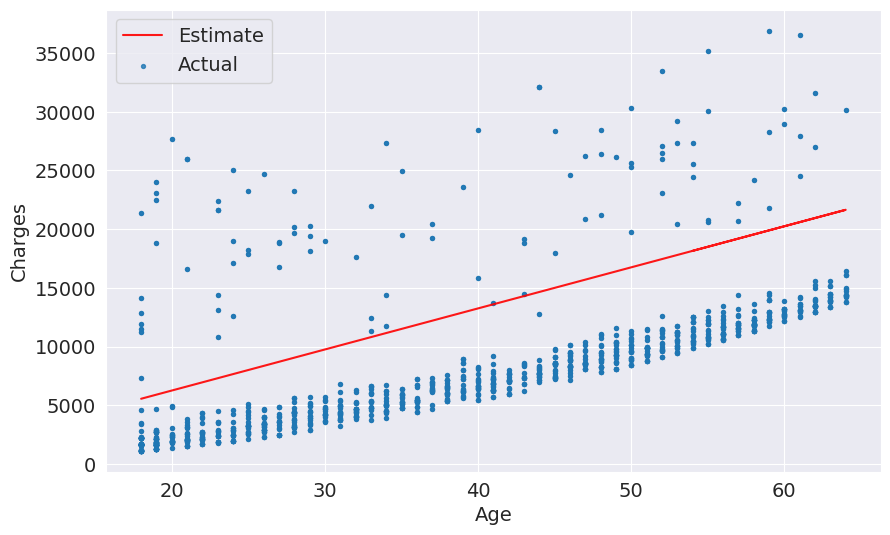

In [98]:
try_parameters(350,-750)

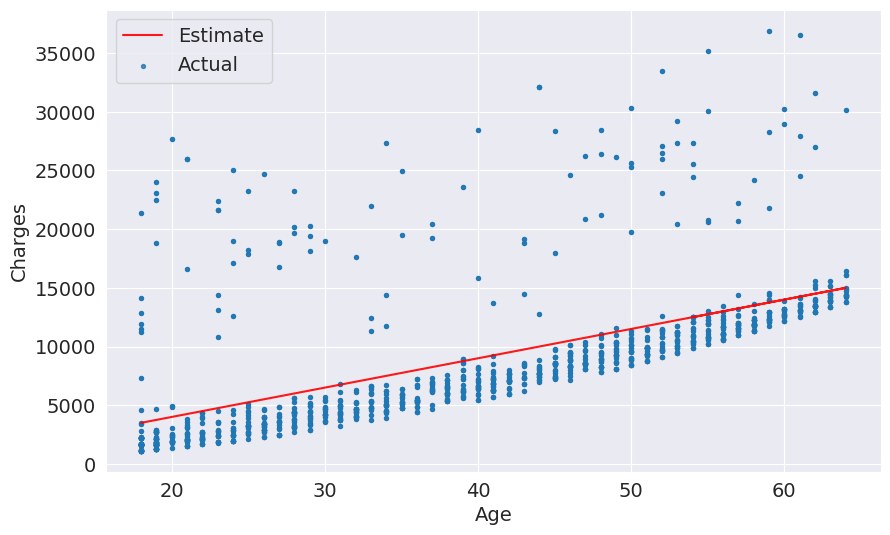

In [99]:
try_parameters(250,-1000)

In [100]:
!pip install numpy --quiet

In [101]:
import numpy as np

In [102]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [103]:
w = 50
b = 100

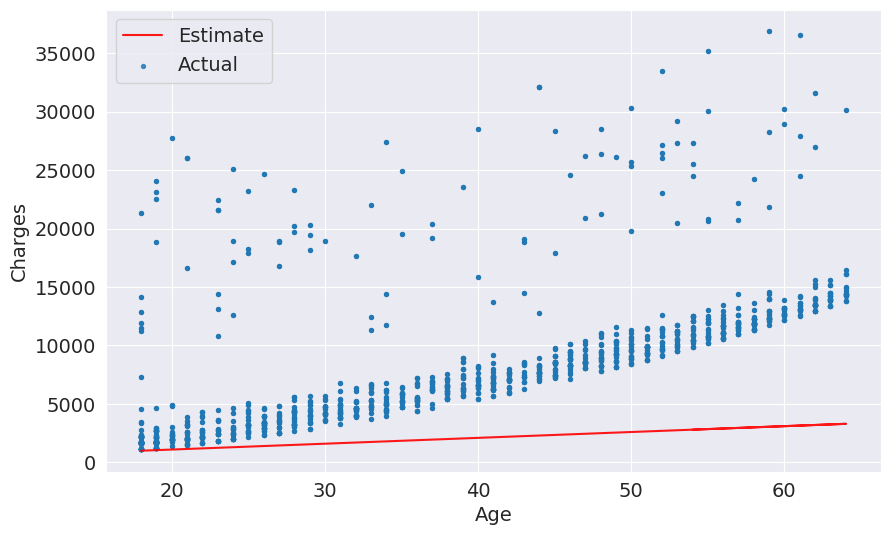

In [104]:
try_parameters(w, b)

In [105]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [106]:
rmse(targets, predicted)

np.float64(8471.933919324138)

In [107]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8471.933919324138


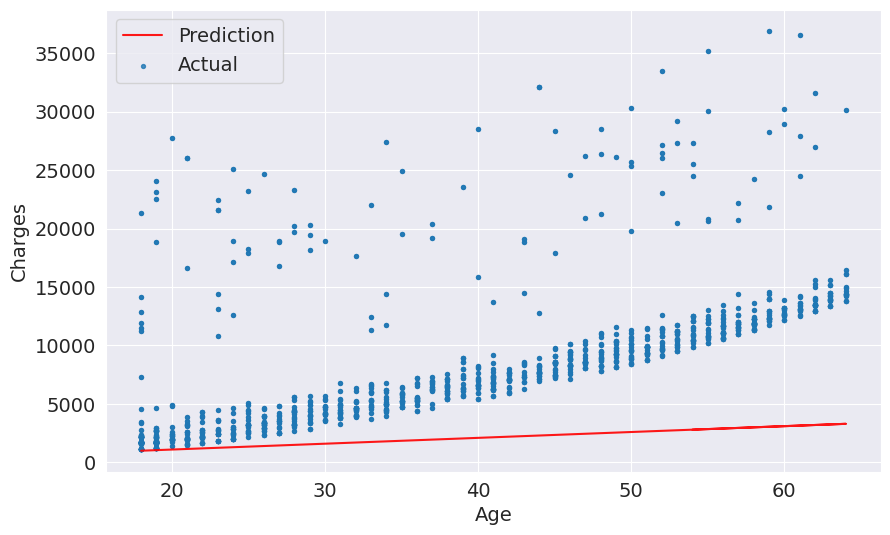

In [108]:
try_parameters(50, 100)

RMSE Loss:  4736.048201592246


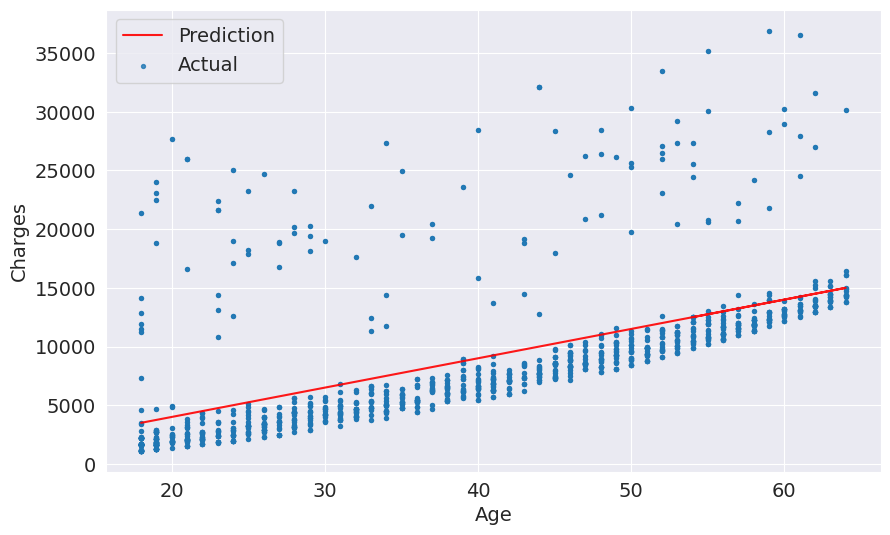

In [109]:
try_parameters(250,-1000)

RMSE Loss:  4723.321511434221


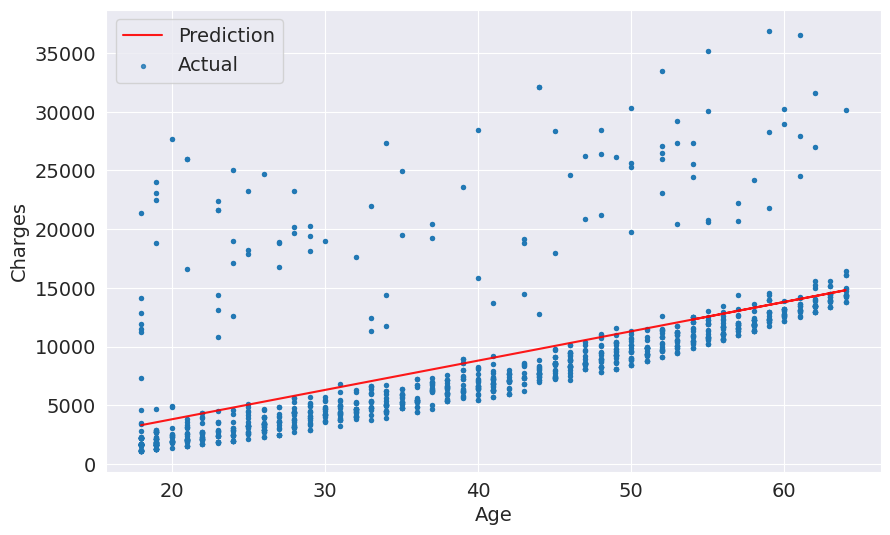

In [110]:
try_parameters(250,-1200)

RMSE Loss:  4715.516444214046


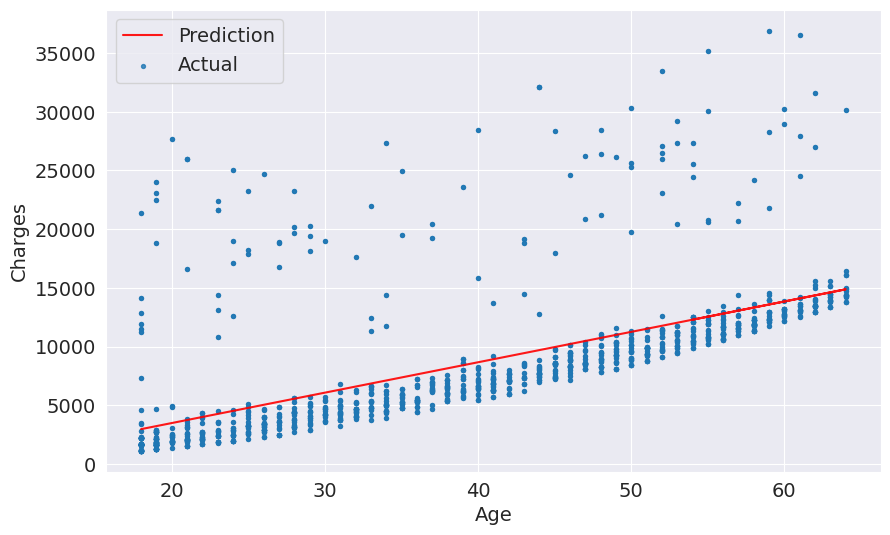

In [111]:
try_parameters(259,-1700)

In [112]:
!pip install scikit-learn --quiet

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [114]:
model = LinearRegression()

In [115]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (2208, 1)
targes.shape : (2208,)


In [116]:
model.fit(inputs, targets)

LinearRegression()

In [117]:
predictions = model.predict(inputs)

In [118]:
predictions

array([ 2788.15462696,  5434.27632388,  6757.33717235, ...,
        3581.99113603,  4111.21547542, 12314.19273589])

In [119]:
rmse(targets, predictions)

np.float64(4714.536974891454)

In [120]:
# w
model.coef_

array([264.61216969])

In [121]:
# b
model.intercept_

np.float64(-1974.8644275087008)

In [122]:
model1 = SGDRegressor()

In [123]:
model1.fit(inputs,targets)

SGDRegressor()

In [124]:
predictions = model1.predict(inputs)
rmse(targets, predictions)


np.float64(4917.075732417297)

In [125]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
...,...,...,...,...,...,...,...
2736,64,male,36.96,2,yes,southeast,49577.6624
2744,32,male,33.63,1,yes,northeast,37607.5277
2764,22,female,31.02,3,yes,southeast,35595.5898
2765,47,male,36.08,1,yes,southeast,42211.1382


In [126]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (564, 1)
 (564,)


In [127]:
model.fit(inputs,targets)

LinearRegression()

In [128]:
predicted = model.predict(inputs)
print('RMSE:',)
rmse(targets,predicted)


RMSE:


np.float64(10669.083353132983)

In [129]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4714.536974891454


In [130]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4714.534426939799


In [131]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.07699235297055058)

In [132]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [133]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [134]:
inputs,targets = non_smoker_df[['bmi']],non_smoker_df['charges']

In [135]:
model = LinearRegression().fit(inputs, targets)

In [136]:
predictions=model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)

Loss: 5996.353766712354


In [137]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13506718103134346)

In [138]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [139]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4660.251892036888


In [140]:
inputs,targets = smoker_df[['age','children','bmi']],smoker_df['charges']

In [141]:
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)

In [142]:
loss = rmse(targets,prediction)
print('Loss',loss)

Loss 5676.2778663014


In [143]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11395.501863564667


In [144]:
px.scatter(medical_df,x="age",y="charges",color='smoker')

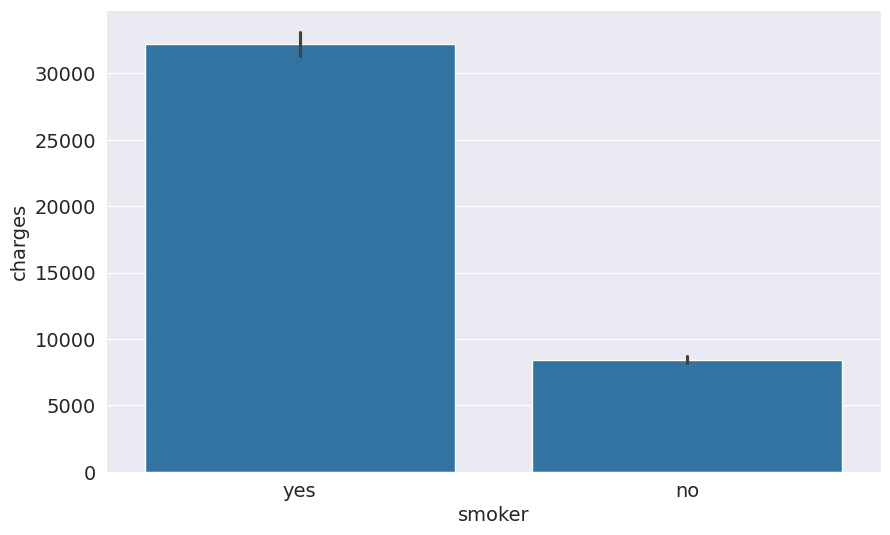

In [145]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [146]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [147]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7887833491419141)

In [148]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0
2768,21,female,34.600,0,no,southwest,2020.17700,0
2769,19,male,26.030,1,yes,northwest,16450.89470,1
2770,23,male,18.715,0,no,northwest,21595.38229,0


In [149]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6080.2426936368565


<Axes: xlabel='sex', ylabel='charges'>

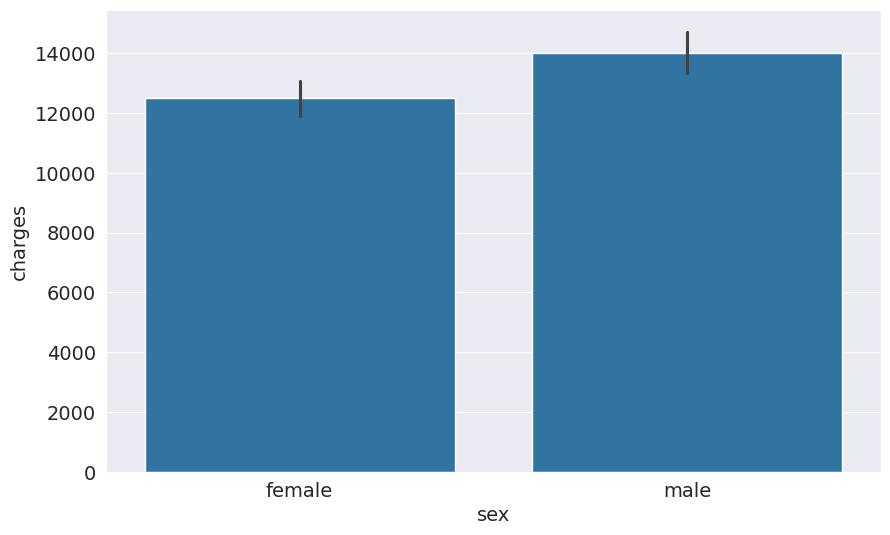

In [150]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [151]:
sex_codes = {'female': 0, 'male': 1}

In [152]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [153]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0
2768,21,female,34.600,0,no,southwest,2020.17700,0,0
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1
2770,23,male,18.715,0,no,northwest,21595.38229,0,1


In [154]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.06283682831973217)

In [155]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6080.177631081255


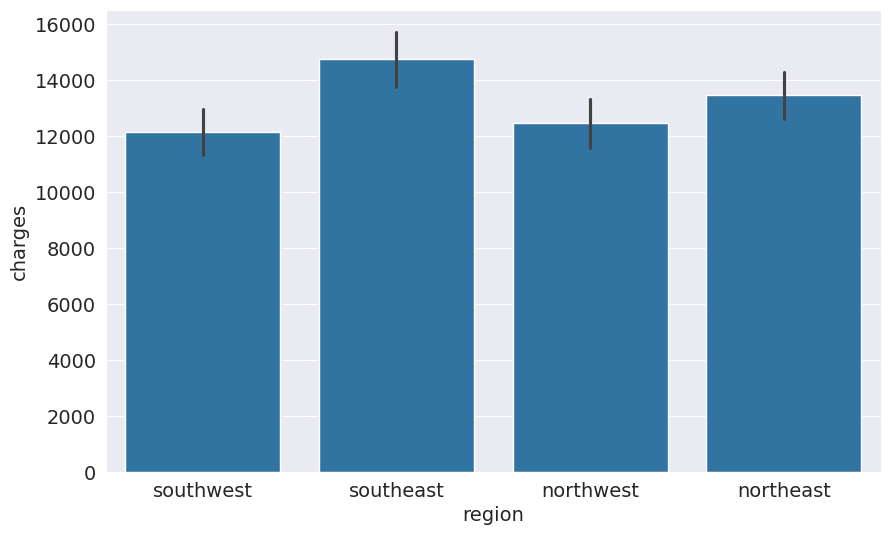

In [156]:
sns.barplot(data=medical_df, x='region', y='charges');

In [157]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [158]:
enc.transform([['northeast']]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [159]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [160]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [161]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,0.0,0.0,1.0,0.0
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,0.0,0.0,0.0,1.0
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,0.0,1.0,0.0,0.0
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,0.0,1.0,0.0,0.0


In [162]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6063.440428453945


In [163]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes)

#one-hot coding for smoker_df
enc.fit(smoker_df[['region']])
one_hot = enc.transform(smoker_df[['region']]).toarray()
one_hot
smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model_smoker = LinearRegression().fit(inputs, targets)

# Generate predictions
prediction = model_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, prediction)
print('Loss:', loss)

Loss: 5626.368037965106


<ipython-input-163-0519233dd7e3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-163-0519233dd7e3>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-163-0519233dd7e3>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-163-051

In [164]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes)

#one-hot coding for smoker_df
enc.fit(non_smoker_df[['region']])
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
one_hot
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model_non_smoker= LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model_non_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4619.992694992508


<ipython-input-164-018cd202917a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-164-018cd202917a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-164-018cd202917a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-164-018

In [165]:
model.coef_

array([  255.57686411,   330.01529325,   506.34254892, 23976.19710395,
         -56.94370305,   616.3640838 ,   284.5232666 ,  -461.99772472,
        -438.88962568])

In [166]:
model.intercept_

np.float64(-12251.815261164138)

In [167]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_ , model.intercept_)
})
weights_df

,feature,weight
0,age,255.576864
1,bmi,330.015293
2,children,506.342549
3,smoker_code,23976.197104
4,sex_code,-56.943703
5,northeast,616.364084
6,northwest,284.523267
7,southeast,-461.997725
8,southwest,-438.889626
9,1,-12251.815261


In [168]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,0.0,0.0,1.0,0.0
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,0.0,0.0,0.0,1.0
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,0.0,1.0,0.0,0.0
2770,23,male,18.715,0,no,northwest,21595.38229,0,1,0.0,1.0,0.0,0.0


In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [171]:
scaler.mean_

array([39.10966811, 30.70134921,  1.1017316 ])

In [172]:
scaler.var_

array([198.21596713,  37.55658786,   1.47522067])

In [173]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
2767,47,45.320,1
2768,21,34.600,0
2769,19,26.030,1
2770,23,18.715,0


In [174]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.42835311, -0.45711365, -0.9070836 ],
       [-1.49938129,  0.50073091, -0.08375821],
       [-0.7890995 ,  0.37508521,  1.56289256],
       ...,
       [-1.42835311, -0.76225322, -0.08375821],
       [-1.14424039, -1.95588746, -0.9070836 ],
       [ 1.05763316,  0.14663846, -0.9070836 ]])

In [175]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [176]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6063.440428453945


In [177]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23976.197104
9,1,8433.479420
0,age,3598.246031
1,bmi,2022.446911
5,northeast,616.364084
2,children,614.996887
6,northwest,284.523267
4,sex_code,-56.943703
8,southwest,-438.889626
7,southeast,-461.997725


In [178]:
new_customers = [[28,30,2,1,0,0,1,0,0.]]
scaler.transform([[28,30,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.7890995 , -0.11444353,  0.73956718]])

In [179]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0.]])

array([30064.78201443])

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2,random_state=0)

In [182]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6146.136441623574


In [183]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6044.445331830097
